In [1]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

import matplotlib.patches as patches
from PIL import Image

import cv2

2022-11-15 19:24:09.455310: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-11-15 19:24:09.779863: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-11-15 19:24:09.779884: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-11-15 19:24:09.827952: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-11-15 19:24:10.605199: W tensorflow/stream_executor/platform/de

In [2]:
df = pd.read_csv('train_labels.csv', dtype=str)

df['label'].value_counts()

0    130908
1     89117
Name: label, dtype: int64

In [3]:
df

,id,label
0,f38a6374c348f90b587e046aac6079959adf3835,0
1,c18f2d887b7ae4f6742ee445113fa1aef383ed77,1
2,755db6279dae599ebb4d39a9123cce439965282d,0
3,bc3f0c64fb968ff4a8bd33af6971ecae77c75e08,0
4,068aba587a4950175d04c680d38943fd488d6a9d,0
...,...,...
220020,53e9aa9d46e720bf3c6a7528d1fca3ba6e2e49f6,0
220021,d4b854fe38b07fe2831ad73892b3cec877689576,1
220022,3d046cead1a2a5cbe00b2b4847cfb7ba7cf5fe75,0
220023,f129691c13433f66e1e0671ff1fe80944816f5a2,0


In [4]:
#acá cambiamos el type de la row label ya que solo pueden ser 0 o 1
df['label'] = df['label'].astype(int)

In [5]:
cancer_positive = df[df["label"] == 1].sample(5)['id']


cancer_negative = df[df["label"] == 0].sample(5)['id']

In [6]:
def readImage(path):
    # OpenCV reads the image in bgr format by default
    bgr_img = cv2.imread(path)
    # We flip it to rgb for visualization purposes
    b,g,r = cv2.split(bgr_img)
    rgb_img = cv2.merge([r,g,b])
    return rgb_img

[ WARN:0@2.945] global /io/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../input/histopathologic-cancer-detection/train/de0c086be39a063be479fa6c449323163e7d252f.tif'): can't open/read file: check file path/integrity


ValueError: not enough values to unpack (expected 3, got 0)

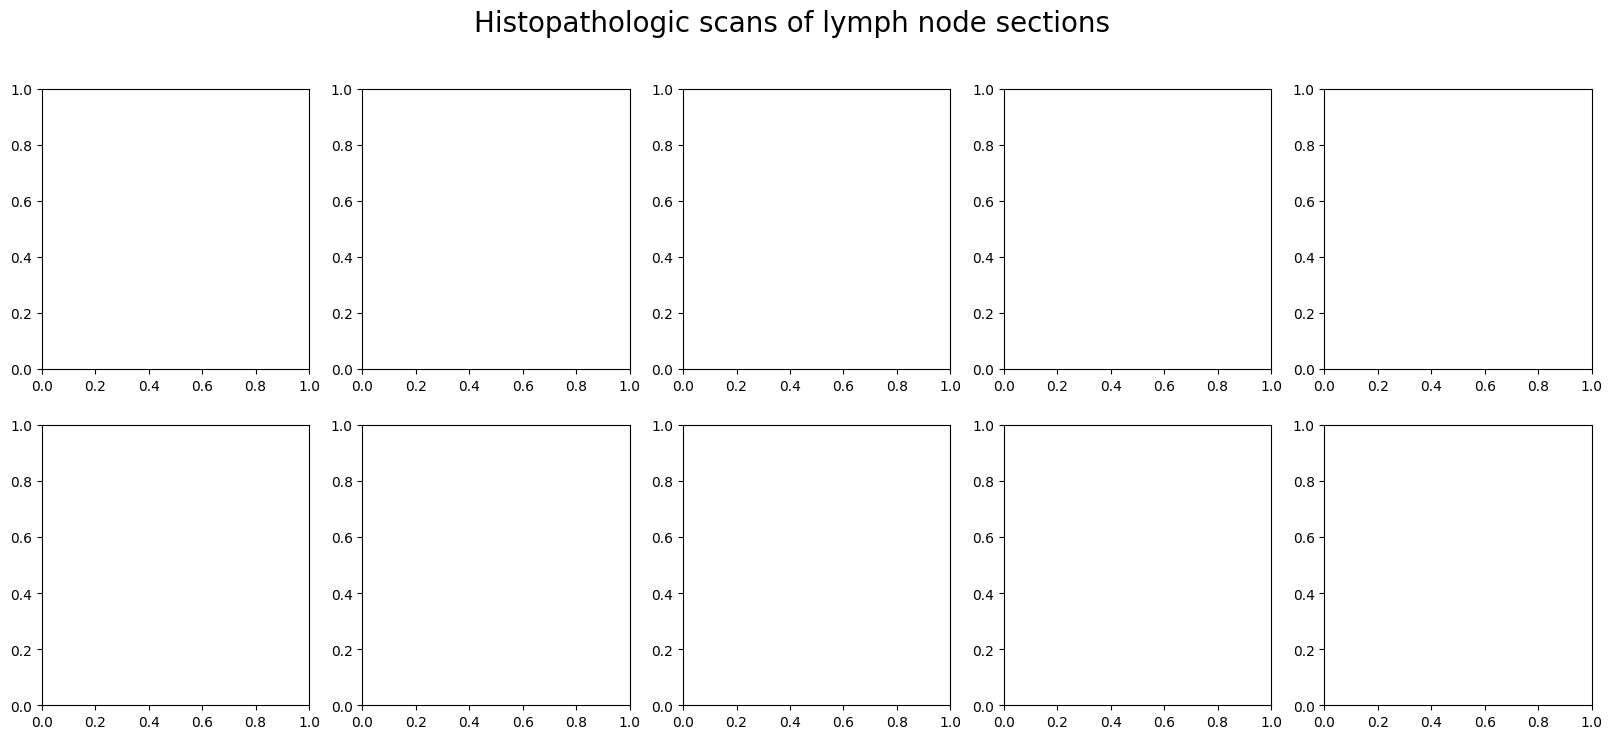

In [7]:
fig, ax = plt.subplots(2,5, figsize=(20,8))
fig.suptitle('Histopathologic scans of lymph node sections',fontsize=20)
dir = '../input/histopathologic-cancer-detection'

# Negatives
for i, idx in enumerate(cancer_negative):
    path = os.path.join(dir, 'train', idx)
    ax[0,i].imshow(readImage(path + '.tif'))
    
ax[0,0].set_ylabel('Negative samples', size='large')

# Positives
for i, idx in enumerate(cancer_positive):
    path = os.path.join(dir, 'train', idx)
    ax[1,i].imshow(readImage(path + '.tif'))
    
ax[1,0].set_ylabel('Tumor tissue samples', size='large')